In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,0.967406,-69.693619,NetBIOS
1,78.376030,-15.459142,LDAP
2,43.559002,-40.516380,NetBIOS
3,64.666115,22.998545,LDAP
4,64.986031,22.281092,LDAP


In [6]:
def euclidean_distance(*args):
    return np.sqrt(np.sum((args[0] - args[1]) ** 2))

In [9]:
samples = df_tsne.sample(100)

<Axes: >

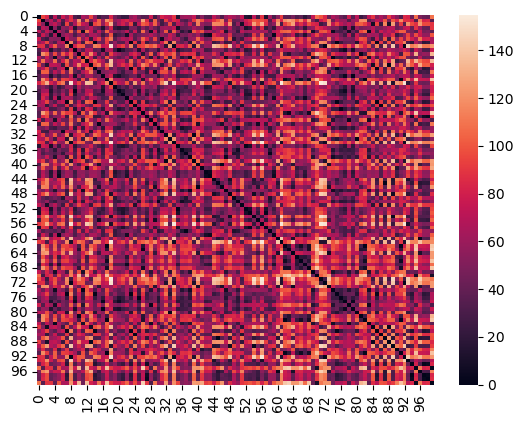

In [10]:
# compute the distance matrix between all the points
distance_matrix = np.zeros((samples[['PC1', 'PC2']].shape[0], samples[['PC1', 'PC2']].shape[0]))
for i in range(samples[['PC1', 'PC2']].shape[0]):
    for j in range(samples[['PC1', 'PC2']].shape[0]):
        distance_matrix[i, j] = euclidean_distance(samples[['PC1', 'PC2']].iloc[i], samples[['PC1', 'PC2']].iloc[j])

sns.heatmap(distance_matrix)

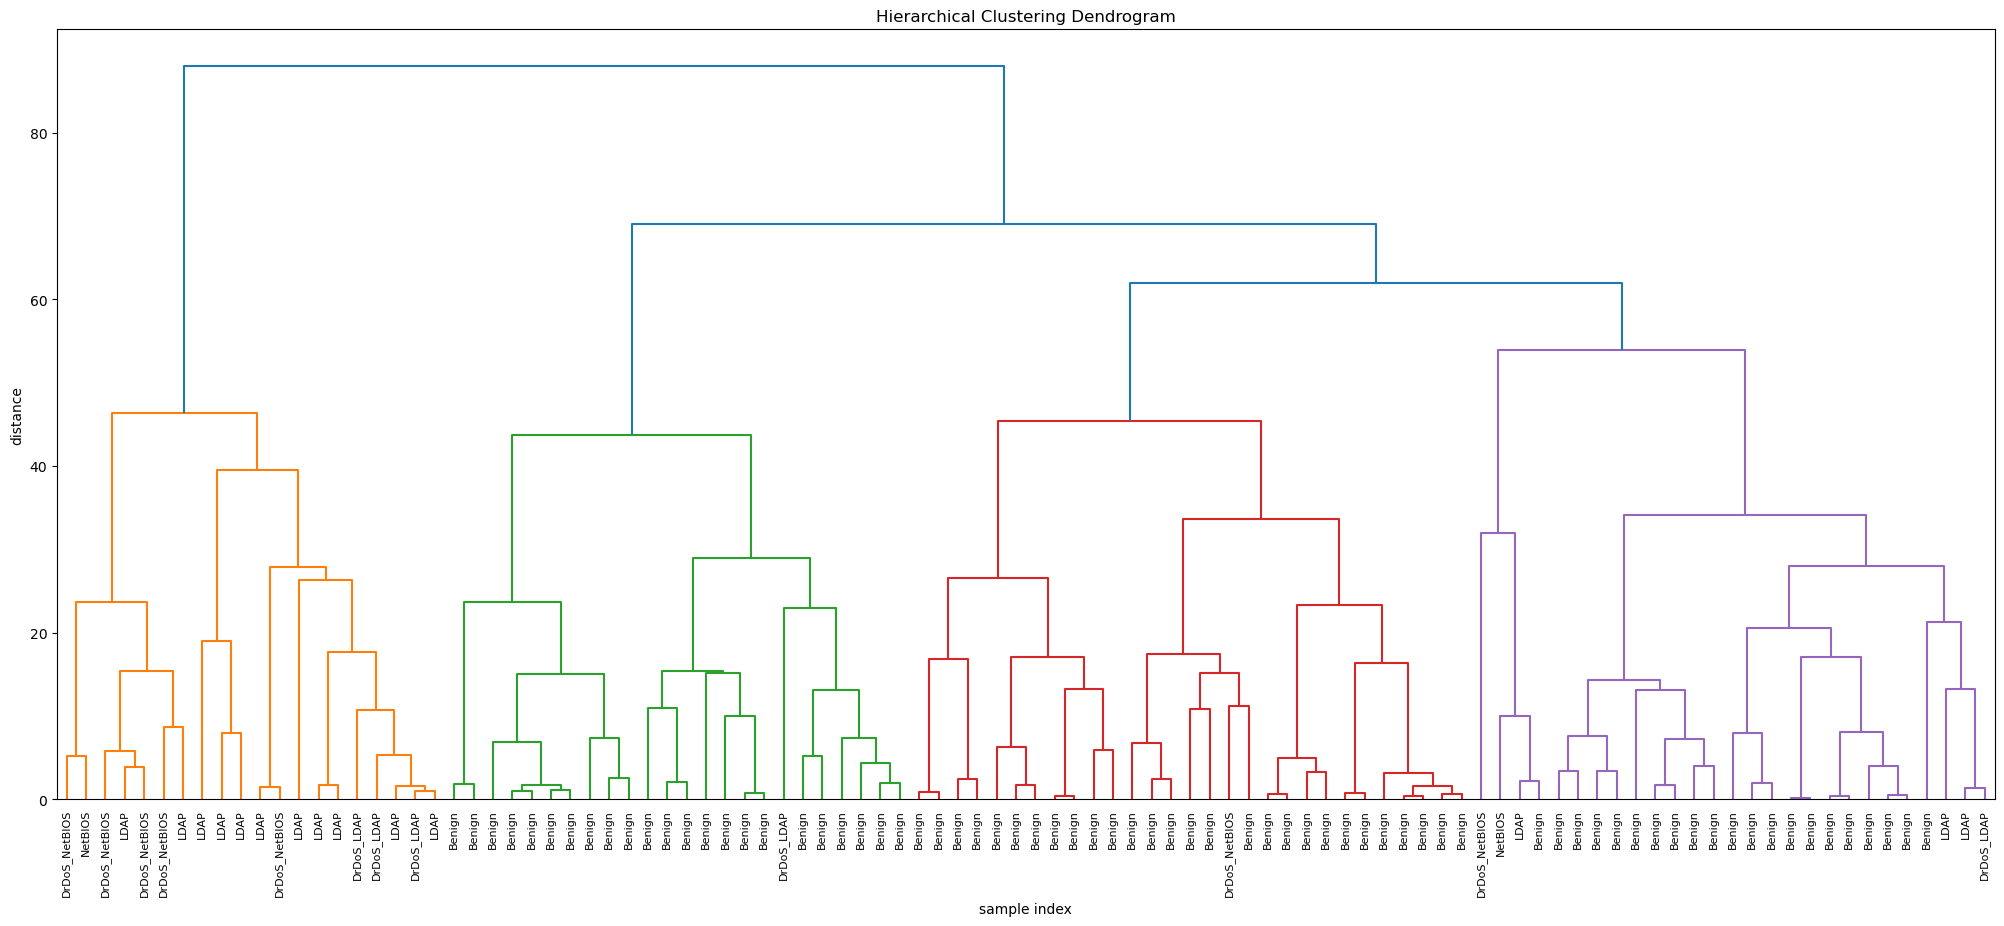

In [13]:
# import linkage
from scipy.cluster.hierarchy import linkage

# compute the linkage matrix
Z = linkage(samples[['PC1', 'PC2']], method='average', metric='euclidean')

# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=samples['Label'].values)
plt.show()